# Raport ze statystyki

In [ ]:
import numpy as np, matplotlib.pyplot as plt, pandas as pd, random, seaborn as sns, math
from scipy.stats import norm, pareto, expon, lognorm

In [ ]:
X = np.random.normal(loc = 2, scale = 2, size = 2000)
n = len(X)


**wykresy**

In [ ]:
plt.boxplot(X)
plt.axhline(y=cos, label = '')

**gęstośc, dytrybuanta**

In [ ]:
sns.ecdfplot(data = X, label = 'dystrybuanta empiryczna')
sns.kdeplot(X, label= 'gestość empiryczna X')
norm.pdf(np.linspace(-3,3,1000))
plt.hist(X, density = True)


**dystrybuanta empiryczna** - moja funkcja

In [ ]:
def demp(X, x):
    n = len(X)
    count = sum(1 for xi in X if xi <= x)
    return count / n
def drewdemp(X,xss,yss): # dystrybuanta empiryczna + teoretyczna
    x_values = np.sort(X)
    y_values = [demp(x_values, x) for x in x_values]
    plt.plot(x_values, y_values, label='empiryczna')
    plt.title('Wykres dystrybuant')
    plt.plot(xss, yss, label='teoretyczna')
    plt.legend()
    plt.show()

**wczytywanie danych z pliku**

In [ ]:
data = pd.read_csv("C:\Users\Maria Nowacka\Downloads\ResumeNames.csv")

# my_file = open("dane_lista1.txt", 'r')
# data = my_file.read().split()
# my_file.close()
data_cat = data.select_dtypes(exclude=np.number)
data_num = data.select_dtypes(include=np.number)
# dane = pd.read_csv('CollegeDist.csv', delimiter=';')['score'].to_list()

**parametry statystyczne**

In [ ]:
def mediana(X):
    n = len(X)
    if n%2==0:
        s = int(n/2)
        return (sorted(X)[s]+sorted(X)[s+1])/2
    else:
        return sorted(X)[int(n/2)]

In [ ]:
def Q1(X):
    s = int(len(X)/2)
    return mediana(X[0:s+1])

In [ ]:
def Q2(X):
    return mediana(X)

In [ ]:
def Q3(X):
    s = int(len(X)/2)
    return mediana(X[s::])

In [ ]:
def rozstepZProby(X):
    return Q3(X)-Q1(X)

In [ ]:
def rozMiedzykwartylowy(X):
    Y = sorted(X)
    return Y[-1] - Y[0]

In [ ]:
def wariancjaZProby(X):
    n = len(X)
    return 1/(n-1)*sum((xi - sum(X)/n)**2 for xi in X)

In [ ]:
def odchylenie(X):
    return math.sqrt(wariancjaZProby(X))

In [ ]:
def mean(X):
    n = len(X)
    return sum(X)/n

**średnie**

In [ ]:
def arytmetyczna(X):
    return mean(X)

In [ ]:
def harmoniczna(X):
    return len(X)/sum(1/xi for xi in X)

In [ ]:
def geometryczna(X):
    n = len(X)
    prod = 1
    for xi in X:
        prod *= xi**(1/n)
    return prod

In [ ]:
def ucinana(X,k):
    n = len(X)
    Xs = sorted(X)
    return 1/(n-2*k) * sum(xi for xi in Xs[k:n-k])

In [ ]:
def winsorowska(X,k):
    n = len(X)
    Xs = sorted(X)
    return 1/n * ((k+1)*Xs[k] + sum(xi for xi in Xs[k+1:n-k]) + (k+1)*Xs[n-k-1])

In [ ]:
ys1 = [ucinana(dane, k) for k in range(1,int(n/2)+1)]
ys2 = [winsorowska(dane, k) for k in range(1,int(n/2)+1)]

**korelacja kolejnościowa (rangowa)**

In [ ]:
def rangi(tablica):
    n = len(tablica)
    tab = tablica.copy()
    tab.sort(reverse = True)
    r = [0]*n
    for i in range(n):
        a = tablica.count(tab[i]) 
        if not a>1:
            r[tablica.index(tab[i])] = i+1
        else:
            suma = a
            indeksy = []
            for j in range(n):
                if tab[i] == tablica[j]:
                    indeksy.append(j)
            for k in range(n):
                if tab[i] == tab[k]:
                    suma += k
            for o in indeksy:
                r[o] = suma/a
    return r

In [ ]:
def spearman(tab1, tab2):
    n = len(tab1)
    return 1 - 6*sum(i**2 for i in [abs(tab1[k]-tab2[k]) for k in range(n)])/(n*(n**2-1))

In [ ]:
# date = pd.read_csv(r'C:\\Users\\Maria Nowacka\Downloads\\GoldSilver.csv')['rownames'].to_list()
# gold = pd.read_csv(r'C:\\Users\\Maria Nowacka\Downloads\\GoldSilver.csv')['gold'].to_list()
# silver = pd.read_csv(r'C:\\Users\\Maria Nowacka\Downloads\\GoldSilver.csv')['silver'].to_list()
# data = pd.read_csv(r'C:\\Users\\Maria Nowacka\Downloads\\GoldSilver.csv')
# year = pd.read_csv(r"C:\\Users\\Maria Nowacka\Desktop\\maria\statystyka\\netflix_titles.csv")['release_year'].to_list()
# rating = pd.read_csv(r"C:\\Users\\Maria Nowacka\Desktop\\maria\statystyka\\netflix_titles.csv")['rating'].to_list()
# dwellings = pd.read_csv('hpimonthlyandqtlytables1to19.csv', delimiter=';')

In [ ]:
# dane = pd.read_csv('CPS1985.csv')
fajne = pd.read_csv(r'C:\\Users\\Maria Nowacka\Downloads\\archive (3)\\athlete_events.csv')['']

In [ ]:
fajne.shape

(271116, 15)

In [ ]:
df = fajne.dropna()
df = df.drop_duplicates()
df.shape
age = df['Age']
height = df['Height']
weight = df['Weight']

In [ ]:
fajne.columns

Index(['ID', 'Name', 'Sex', 'Age', 'Height', 'Weight', 'Team', 'NOC', 'Games',
       'Year', 'Season', 'City', 'Sport', 'Event', 'Medal'],
      dtype='object')

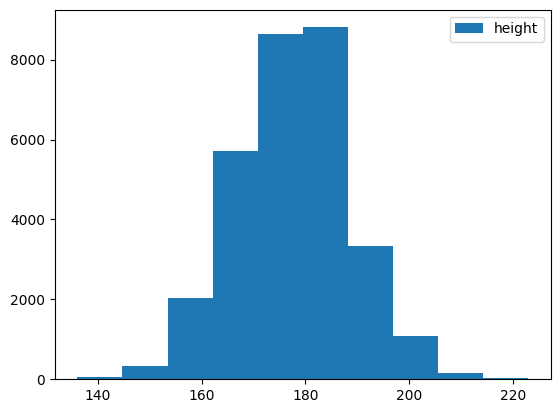

In [ ]:
plt.hist(height, label = 'height')
# plt.hist(silver, label = 'silver', alpha = 0.7)
plt.legend()
plt.show()

(array([2.6600e+02, 4.2290e+03, 1.2051e+04, 9.2890e+03, 3.5110e+03,
        6.2800e+02, 1.4500e+02, 4.5000e+01, 1.2000e+01, 5.0000e+00]),
 array([ 28. ,  43.4,  58.8,  74.2,  89.6, 105. , 120.4, 135.8, 151.2,
        166.6, 182. ]),
 <BarContainer object of 10 artists>)

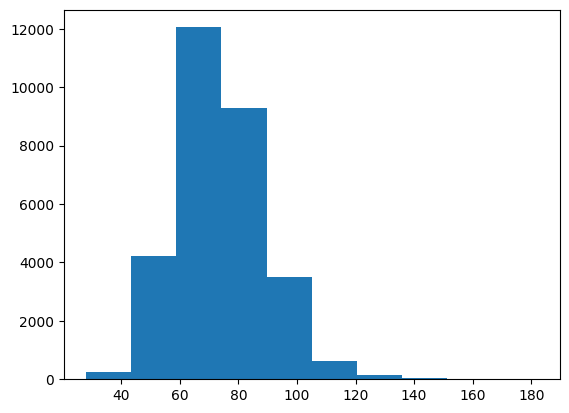

In [ ]:
plt.hist(weight)

(array([1.5450e+03, 1.0006e+04, 1.1746e+04, 5.5300e+03, 9.1200e+02,
        2.7300e+02, 1.2000e+02, 3.3000e+01, 1.3000e+01, 3.0000e+00]),
 array([13. , 18.3, 23.6, 28.9, 34.2, 39.5, 44.8, 50.1, 55.4, 60.7, 66. ]),
 <BarContainer object of 10 artists>)

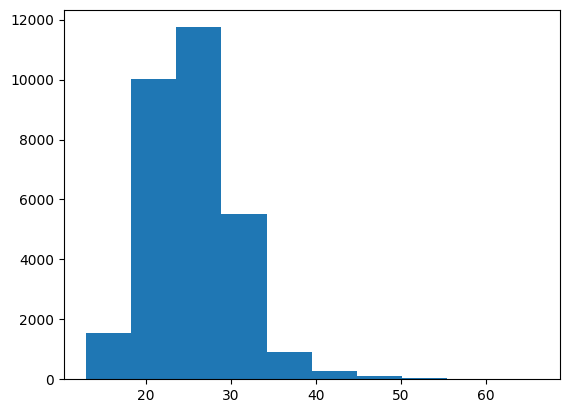

In [ ]:
plt.hist(age)

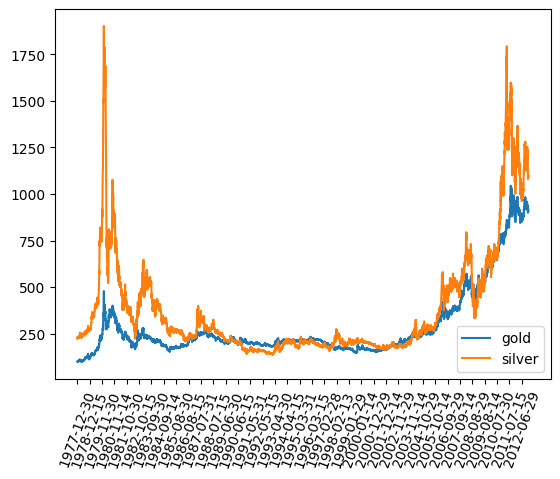

In [ ]:
# xs = date[0: -1: 10]
c = 250
plt.plot(date, gold, label = 'gold')
plt.plot(date, silver, label = 'silver')
plt.legend(loc = 'best')
plt.xticks(rotation=70)
plt.xticks(range(0, len(date), c), date[::c])
plt.savefig("wykres_cen.png")
plt.show()

In [ ]:
max(silver)

1901.93

In [ ]:
# data = data.replace('yes', 1)
# data = data.replace('no', 0)
# data = data.replace('male', 1)
# data = data.replace('female', 2)
# data.isna().sum()
# data_cat = data.select_dtypes(exclude=np.number)
data_num = df.select_dtypes(include=np.number)
dd = df.drop(["ID"], axis=1)
dd = dd.drop(['Year'], axis=1)
dd = dd.drop(['Age'], axis=1)

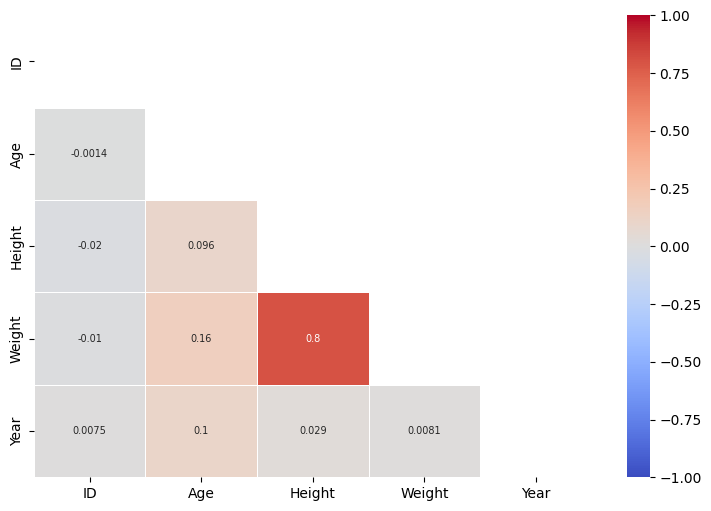

In [ ]:
fig, ax = plt.subplots(figsize=(9, 6))
corr = data_num.corr()
mask = np.triu(np.ones_like(corr, dtype=bool))
sns.heatmap(corr, mask=mask,  annot=True, square=False, linewidths=.5, 
                  annot_kws={"size": 7}, vmin=-1, vmax=1, cmap="coolwarm")
plt.show()

In [ ]:
for col in df.columns:
    if col == 'rownames':
        pass
    fig, ax = plt.subplots(figsize=(10, 5))
    sns.countplot(x=col, data=data)
    plt.plot()
    # classes = len(data[col].unique())
    # if classes > 7:
    #     plt.xticks(rotation=80)
    # plt.show()


In [ ]:
data.columns

Index(['rownames', 'affairs', 'gender', 'age', 'yearsmarried', 'children',
       'religiousness', 'education', 'occupation', 'rating'],
      dtype='object')

In [ ]:
fig, ax = plt.subplots(figsize=(10, 5))
sns.countplot(hue='children',x='affairs', data=data)